# How to train a Machine?
We follow these basic steps for a typical Machine Learning project
- Split data into two sets, one for training our ML Model and another for testing it's accuracy
- In training, the model learn and identify patterns based on numbers provided in input
- With the best identified pattern, it generates it's own decision tree / algorithm, and model is said to be `trained`
- The trained model is then tested for accuracy using the testing set we splited earlier
- If model is fairly accurate we can finally use the model in real-life application!

# What exactly training is?
Using the data to understand and learn patterns is reffered to the process of training.

**Note :** Our data have 583 entries (rows) and 10 features (columns)

In [1]:
# Standard imports & data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv("Indian Liver Patient Dataset.csv")
data["alkphos"] = data["alkphos"].fillna(data["alkphos"].mean())
data["gender"] = data["gender"].apply(lambda x: 1 if x == "Female" else 0)
X = data.drop(labels="is_patient", axis=1)
y = data["is_patient"]
np.random.seed(19) # To make results reproducable (19 because I'm 19 Y.O.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(583, 10)

# Making Model on our own
- We will be taking help of the results and facts we got to learn from [Analysis of the Liver patient data for 583 people](https://www.kaggle.com/abdullahanwar7/liver-disease-ml-classification). The data has been collected from Andhra Pradesh, India.
- We will consult the co-relations of factors on Liver Disease report results to know which data is most relevant to us.

    <img src="images/dependence.png" alt="Corelations" width=500/>

In [2]:
# Directly using whole data
trainData : pd.DataFrame
trainData = X
trainData["target"] = y
targets = trainData.groupby(by=["target", "gender"]).mean() # Mean
std = trainData.groupby(by=["target", "gender"]).std() # Standard deviation
y_predict = []
i : pd.Series
for i in X.iloc(0):
    if i["gender"] == 0: # if male
        if i["sgpt"] > targets["sgpt"][1][0] - std["sgpt"][1][0] / 2 :
            y_predict.append(1)
        else:
            if i["sgot"] > targets["sgot"][1][0] - std["sgot"][1][0] / 2 :
                y_predict.append(1)
            else:
                y_predict.append(2)
    else: # if female
        if i["sgpt"] > targets["sgpt"][1][1] - std["sgpt"][1][1] / 3 :
            y_predict.append(1)
        else:
            if i["sgot"] > targets["sgot"][1][1] - std["sgot"][1][1] / 3 :
                y_predict.append(1)
            else:
                y_predict.append(2)

print(f"On using complete dataset and making predictions, model achieved an accuracy score of {accuracy_score(y, y_predict)*100:.2f}%")


On using complete dataset and making predictions, model achieved an accuracy score of 60.72%


In [3]:
# Learn from train data and apply it on test data (which is what ML does)
trainData : pd.DataFrame
trainData = X_train
trainData["target"] = y_train
targets = trainData.groupby(by=["target", "gender"]).mean() # Mean
std = trainData.groupby(by=["target", "gender"]).std() # Standard deviation
y_predict = []
i : pd.Series
for i in X_test.iloc(0):
    if i["gender"] == 0: # if male
        if i["sgpt"] > targets["sgpt"][1][0] - std["sgpt"][1][0] / 2 :
            y_predict.append(1)
        else:
            if i["sgot"] > targets["sgot"][1][0] - std["sgot"][1][0] / 2 :
                y_predict.append(1)
            else:
                y_predict.append(2)
    else: # if female
        if i["sgpt"] > targets["sgpt"][1][1] - std["sgpt"][1][1] / 3 :
            y_predict.append(1)
        else:
            if i["sgot"] > targets["sgot"][1][1] - std["sgot"][1][1] / 3 :
                y_predict.append(1)
            else:
                y_predict.append(2)

print(f"On using actual ML situation, model achieved an accuracy score of {accuracy_score(y_test, y_predict)*100:.2f}%")

On using actual ML situation, model achieved an accuracy score of 51.28%


- So we made up an unpolished algorithm, which is predicting with help of 3 most dependent factors but achieves only an accuracy of `51.28%`
- It's is like tossing a coin to predict if someone has an illness or not!
- For obvious reason, no one will actually want to use such a model in practical purpose.
- Let's try to make a machine learn from the data we just intrepreted and evaluate how it performs.

# Using Machine Learning
We are using `RandomForestClassifier` provided by `scikit-learn` library in python.
We will also try to visualize step by step exactly what it does.

In [4]:
# Now let's try using ML for the job
np.random.seed(19)
X = data.drop(labels="is_patient", axis=1)
y = data["is_patient"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
np.random.seed(19)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(f"On using Machine Learning, model achieved an accuracy score of {accuracy_score(y_test, y_predict)*100:.2f}% which is\nfar more accurate than the manually generated models and can further be improvised!")

On using Machine Learning, model achieved an accuracy score of 74.36% which is
far more accurate than the manually generated models and can further be improvised!



### Visualising concept of Machine Learning
Let us first understand our model in breif using layman language such that even a person with minimal amount of knowledge on ML
- Firstly from the data provided `RandomForestClassifier` randomly selects samples with replacement. So out of 583 patient data the model first creates various subsets.
- Each subset contains some randomly selected rows along with some of randomly selected features
- A same entry may repeat multiple times in a subset ( that's what `with replacement` implies )
- This above steps are classified as `Bootstrapping`

    ![bootstrapping](images/bootstrapping.png)
    
    (Source : Google)
- Each and every subset is evaluated and the model then generates a `Decision Tree` i.e. - an algorithm based on patterns in the subset.
- Hence, the model ends up with various Decision Trees, one may think that the best decision tree is evaluated and used but no! All the decision treers are used! How?
- The model predicts the result using all the decision trees and conducts voting i.e- check which of the results are most frequent, whichever result has maximum votes is declared as the result. This process is said to be `Aggregation`
- `RandomForestClassifier` hence gives us result by using Bootstrapping and Aggregation, collectively reffered to as `Bagging`

## Bootstrapping

In [5]:
# Let's look at a sample data and perform bootstrapping!
bootstrap_table = pd.read_csv("sample_data.csv")
tick_size = 4
how_much_data = 4
bootstrap_table

,Name,Age,Gender
0,Vishal,19,Male
1,Prerna,9,Female
2,Ekta,24,Female
3,Ishit,12,Male
4,Sanya,16,Female
5,Dipti,7,Female
6,Mihir,10,Male
7,Harshmeet,13,Female
8,Upwan,21,Male
9,Priyanshu,15,Male


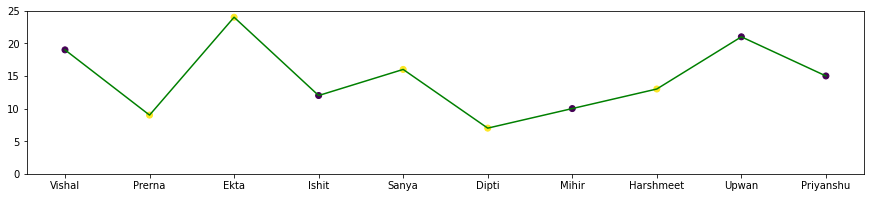

In [6]:
# Visualize the table
plt.subplots(figsize=(15,3))
plt.ylim((0,25))
plt.scatter(bootstrap_table["Name"],bootstrap_table["Age"],c=bootstrap_table["Gender"].apply(lambda x: 0 if x== "Male" else 1));
plt.plot(bootstrap_table["Name"],bootstrap_table["Age"], c="green");

So here we will see the outut subsets to visualize bootstrapping!


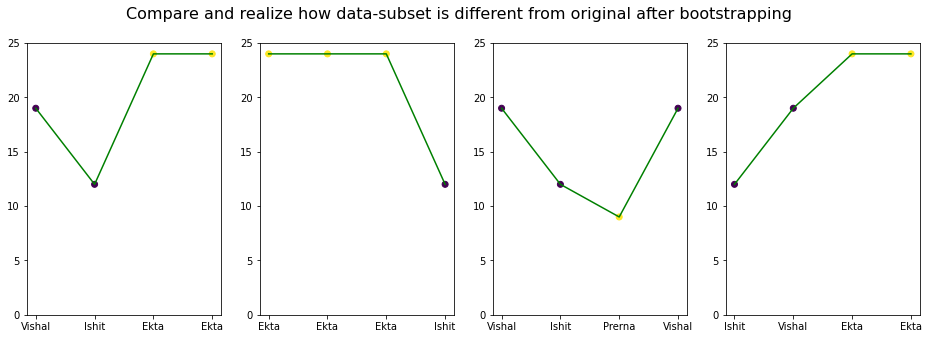

In [7]:
print("So here we will see the outut subsets to visualize bootstrapping!")
a= []
for i in range(how_much_data):
    a.append(bootstrap_table.iloc[np.random.randint(tick_size, size=tick_size)].reset_index(drop=True))
fig, ax = plt.subplots(ncols=len(a),figsize=(4*len(a),5))
ticks = np.arange(1, tick_size+1)
for i in range(0, 4):
    b = a[i]["Gender"].apply(lambda x: 0 if x == "Male" else 1)
    ax[i].scatter(ticks, a[i]["Age"], c=b)
    ax[i].plot(ticks, a[i]["Age"], c="green")
    ax[i].set_ylim((0,25))
    ax[i].set_xticks(ticks=ticks, labels=a[i]["Name"])
fig.suptitle("Compare and realize how data-subset is different from original after bootstrapping", fontsize=16);

# Decision Tree
Let us move forward to understand a Decision Tree and learn terms like `Gini Index` and apply it to our Liver Patient Model.

- We will be using a subset of above data to build a decision tree

In [8]:
subset = bootstrap_table[(bootstrap_table["Name"] == "Vishal") | (bootstrap_table["Name"] == "Prerna") | (bootstrap_table["Name"] == "Ekta") | (bootstrap_table["Name"] == "Ishit")]
subset

,Name,Age,Gender
0,Vishal,19,Male
1,Prerna,9,Female
2,Ekta,24,Female
3,Ishit,12,Male


- The data is really simple such that we can build it's tree on our own but let's not do that and build is using ML
- Here, I have made the Decision Tree and tweaked it a little to make it more readable

    <img alt="Sample decision tree" src="sample.png" width=500 />

    We can see that we initially start with a subset of four person i.e. with `4 values`. Now the tree basically divides them on basis of one of the feature i.e. - Age into two sets each containing `2 values`. In this tree, if the age is `less than or equal to 15.5` the tree proceeds towards left resulting and further if gender of the person is `Female` it proceeds towards left to the value `Prerna` otherwise towards right to the value `Ishit`.
    
    Take a moment to read the data and understand the tree!
    
- Simple right? Now let's understand what `gini` is in layman language as well as techinally!
    
    With every step we see the gini value lowers and finally when the final result is evaulated it becomes `zero`. It may be case that gini value increase in between some step but if we observe, then the tree finally ends when it is sure of the final `value` which was to be evaluate and `gini = 0`.

    From the above observation one can say gini is the inverse of accuracy! Lower the gini more sure is the model about something. For eg. - If we give the tree the data to look who is the person with age less than 15.5 it will have accuracy corresponding to gini `0.5` while if we give in information on gender also, the accuracy corresponding to gini `0` which means the result got more accurate!

    Technically, Gini is calculated by subtracting the sum of squared probabilities of each class from one, higher the probability, lower is the gini value. This defination fits parallely to what we just interpreted!

*At this point I will like to clarify that I did some simple "googling" to understand how to build these trees and [wrote the script to build a tree from our model](generate_tree.py) by [reading from multiple sources](https://www.google.com/search?q=generate+tree+from+scikit+learn+model+as+dot+file).*

Now let's use this knowledge and try to read a portion of the Decision Tree generated for the Liver Patients Dataset.

**Dictionary :**
1. `age` - Age of the patient
1. `gender` - Gender of the patient
1. `tot_bilirubin` - Total Bilirubin
1. `direct_bilirubin` - Direct Bilirubin
1. `alkphos` - Alkaline Phosphotase
1. `sgpt` - Alamine Aminotransferase
1. `sgot` - Aspartate Aminotransferase
1. `tot_proteins` - Total Protiens
1. `albumin` - Albumin
1. `ag_ratio` - Albumin and Globulin Ratio
1. `is_patient` - Liver Patient or Not (`1` if `true` `2` if `false`)


<img src="first_members.png" width=500 alt="First few members of one of the Liver Model Tree" />

In [9]:
y.value_counts()

1    416
2    167
Name: is_patient, dtype: int64

- We see that at the starting of tree, we have a total of `412 + 171 = 583`. One may think that the data contained `416` liver diseased patient and `167` non-liver diseasedpatient then why different value ( `412` and `171` ) appear in the tree?

    Answer lies in `Bootstraping` the data was bootstrapped before been analysed and building of the tree! It's really cool actually to visualize these small things and understand theory along with it!

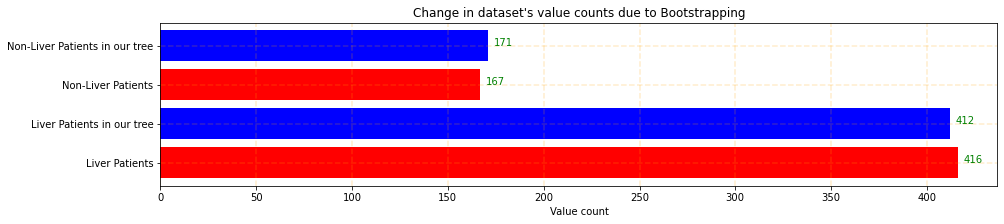

In [10]:
plt.subplots(figsize=(15,3))
plt.grid(color ='orange',
        linestyle ='--', linewidth = 1.5,
        alpha = 0.2)
d = [416,412,167,171]
plt.barh(["Liver Patients","Liver Patients in our tree", "Non-Liver Patients","Non-Liver Patients in our tree"], d,color=["red","blue","red","blue"]);
for i, v in enumerate(d):
    plt.text(v + 3, i, str(v), color='green')
plt.xlabel("Value count")
plt.title("Change in dataset's value counts due to Bootstrapping")
plt.show();

- Coming back to tree, observe it properly and let's talk about it!

    As I already informed, it's just a part of the full tree is not complete. But yet we see gini value lowering a lot! This is why machine learning takes edge. Accuracy is really higher upon using machine learning rather than the custom build model! Also, this can further be increased by improvising (which we will check out later) or by using a better model which fits better as per our data.

- Let's now have a peek at the full Decision tree!

    <img src="tree.png" width=800/>

    Woah! It looks pretty complicated. Let's try to understand why?

    - The data is about 583 patients and every parameter are interlinked somehow to the person being liver diseased or not
    - Every data is unique in it's own way
    - A feature which is too high in one person may be too low in another
    - In short, the standard deviation (std) is significant! (`standard deviation` is basically the spread of data, lower the std more precise is the data)
    - To predict something with such a large a variance, the data has to be filtered a lot of times!
    - All these filtering of data makes tree complicated and we end up with a decision tree which is sometimes practically impossible for a human to understand

- Let's understand what I mean with word "spread" of data when I meantion of `Standard Deviation`. Observe how the data even varies 10 folds from the mean value with help of visualization from Histogram! This exlains the large standard deviation value.

                  Standard Deviation
age                        16.189833
gender                      0.429603
tot_bilirubin               6.209522
direct_bilirubin            2.808498
tot_proteins              242.937989
albumin                   182.620356
ag_ratio                  288.918529
sgpt                        1.085451
sgot                        0.795519
alkphos                     0.318492


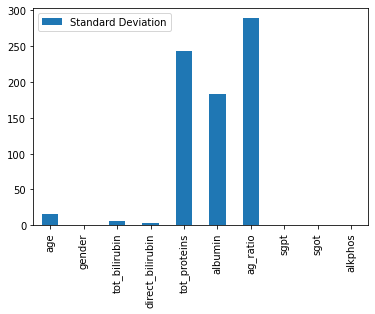

In [11]:
std = pd.DataFrame(X.std(), columns=["Standard Deviation"])
print(std)
std.plot(kind="bar");

Text(0.5, 0.98, 'Histogram : Data spread of different factors')

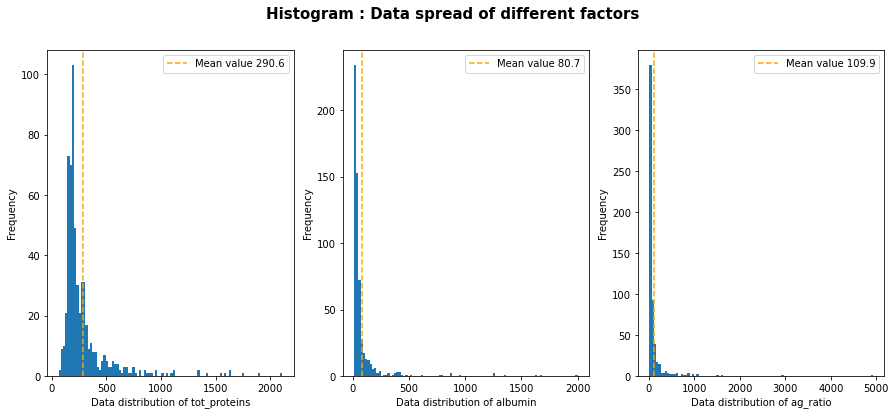

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(15,6))
to_plot = ["tot_proteins","albumin", "ag_ratio"]
for i in range(len(ax)):
    ax[i].hist(X[to_plot[i]], bins=100);
    ax[i].set_xlabel(f"Data distribution of {to_plot[i]}")
    ax[i].set_ylabel("Frequency")
    ax[i].axvline(x=X[to_plot[i]].mean(), c="orange", linestyle="--", label=f"Mean value {X[to_plot[i]].mean():.1f}")
    ax[i].legend()
fig.suptitle("Histogram : Data spread of different factors", fontsize=15, fontweight="bold")

- Since we are using `RandomForestClassifier` our model is not just utilizing this single complicated tree but a variety of such trees! To be specific, we have passed a parameter `n_estimators=100` while training our model in the line

    `model = RandomForestClassifier(n_estimators=100)`

    which is actually the number of trees it's using. So we have a total of 100 trees like this one and they are voting whether a patient has heart disease or not and the class which get majority of vote wins and is outputed.

- All trees vote against for a particular data. Let's visualize the voting!

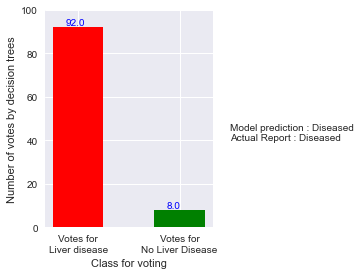

In [13]:
np.random.seed(3010) # to produce reproducable results : well 30/10 is my birthday!
a = X_test.sample()
b = model.predict_proba(a)[0]
plt.style.use("seaborn")
plt.subplots(figsize=(3,4))
plt.ylim((0,100))
plt.ylabel("Number of votes by decision trees")
plt.xlabel("Class for voting")
bar = plt.bar(["Votes for\nLiver disease", "Votes for\nNo Liver Disease"], b*100, width=[0.5,0.5],color=["red", "green"]);
plt.text(x=1.5, y=40, s=f"Model prediction : {'Diseased' if model.predict(a)[0] == 1 else 'Not Diseased'}\nActual Report : {'Diseased' if (data.loc[a.index]['is_patient'] == 1 ).bool else 'Not Diseased'}")
for i in bar:
    height = i.get_height()
    plt.text(x=i.get_x() + i.get_width() / 4, y=height+1,s=f"{height}",color="blue")

# Visualizing improvements in Model
We have learnt the fact that our model uses various amounts of different decision trees. Let us now vary the number of decision trees and understand the pattern to try to obtain a better model.

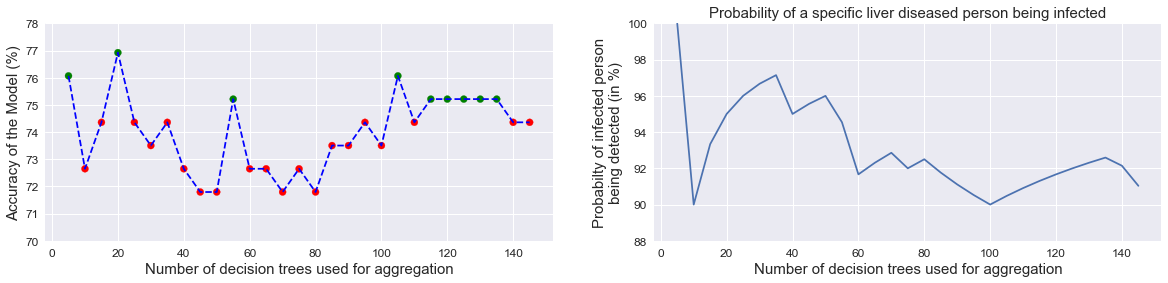

In [14]:
scores = []
h = []
estimators = np.arange(5, 150, 5)
for n in estimators:
    np.random.seed(1) # to make result reproducable
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    h.append(model.predict_proba(a)[0][0])
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores = np.array(scores)
plt.style.use("seaborn")
fig, ax = plt.subplots(ncols=2, figsize=(20,4))
ax[0].set_ylim((np.floor((scores.min()*10))*10, np.ceil((scores.max()*10))*10-2))
ax[0].set_ylabel("Accuracy of the Model (%)", fontsize=15)
ax[0].set_xlabel("Number of decision trees used for aggregation", fontsize=15)
ax[0].tick_params(labelsize=12)
ax[0].scatter(x=estimators, y= scores*100, c=pd.Series(scores*100).apply(lambda x: "green" if x>75 else "red"))
ax[0].plot(estimators, scores*100, linestyle="--", c="blue");
ax[1].plot(estimators, np.array(h) * 100)
ax[1].set_ylim(88,100)
ax[1].tick_params(labelsize=12)
ax[1].set_title("Probability of a specific liver diseased person being infected", fontsize=15)
ax[1].set_xlabel("Number of decision trees used for aggregation", fontsize=15)
ax[1].set_ylabel("Probabilty of infected person\nbeing detected (in %)", fontsize=15);

- We observe that using `n_estimators` or decision trees beyond a value and using them below a value will lead to inaccuracies in our model.
- An ideal model should have a considerably high accuracy but should not be too high as well as an over-fitting model can be harmful too as it may have learned some kind of fixed pattern which may fail in near future. Also an under-fitting model may also fail in practical usage.
- In our case, we get a pretty good accuracy of around `77%`, we didn't increase accuracy by many folds because our previous settings was pretty fine as well, but this method actually help us to understand the importance of testing our model at different parameters.
- Although 77% is a decent value but if we want to increase accuracy even more, we may try using different models. Let's not get involved in that right now!

# Summary

So that's it with our ML Model Analysis, I hope by this point you would have learnt or improved understanding on the following points :
1. Learning how we make our custom model (no use of `scikit-learn` or any other library) by deeply analysing the dataset.
1. Understanding how Machine Learning Algorithm takes the edge in terms of Accuracy and Speed.
1. The processes involved in training a model and understanding them one-by-one.
1. Understanding simple terms and visualizing flowcharts to implement them in our project.
    - `Decision Tree`
    - `Gini Index` and it's relation with probabilty and accuracy
    - Reading a decision tree
1. Learning & Understanding how the `RandomForestClassfier()` from `sklearn.ensemble` works along with technical/statistical terms
    - `Bootstraping`
    - How it reflects the change of sample space size in every Decision Tree through example and graphical representaion
    - `Aggregation`
    - How it uses a lot of Decision Trees instead of relying on one
    - The system of predicting through means of voting by every estimator/tree
    - `Standard Deviation` as a spread of data
    - Combined form : `Bagging`
    - Improving model by varying the numer of `n_estimators` or Decision Trees
    - A conceptual idea of using different models to get better accuracy
    